In [1]:
import sys
sys.path.append('..')
# sys.path.append('../policy-gradient-methods/')
%pylab inline
import numpy as np
import torch
import torch.nn as nn
from rvi_sampling.distributions.analytic_posterior import TwoStepRandomWalkPosterior
from rvi_sampling.StochasticProcess import RandomWalk, PyTorchWrap
from rvi_sampling import ISSampler, MCSampler, ABCSampler
from rvi_sampling import RVISampler
from rvi_sampling.distributions.proposal_distributions import SimonsProposal
from rvi_sampling.distributions.prior_distributions import DiscreteUniform
from rvi_sampling.plotting import visualize_proposal

Populating the interactive namespace from numpy and matplotlib


In [2]:
sp1 = SimonsProposal()
sp2 = torch.load('./policnet.pyt')

In [3]:
t, x, x_arrows, y_arrows_normal = visualize_proposal([sp1], 50, 10, neural_network=False)
t, x, x_arrows, y_arrows_nn = visualize_proposal([sp2], 50, 10, neural_network=True)

../rvi_sampling/distributions/proposal_distributions.py:89: RuntimeWarning: divide by zero encountered in true_divide
  bias = (sign * self.push_toward - w) * 1. / time_left
../rvi_sampling/distributions/proposal_distributions.py:86: RuntimeWarning: invalid value encountered in true_divide
  sign = w / np.abs(w)


Text(0,0.5,'x')

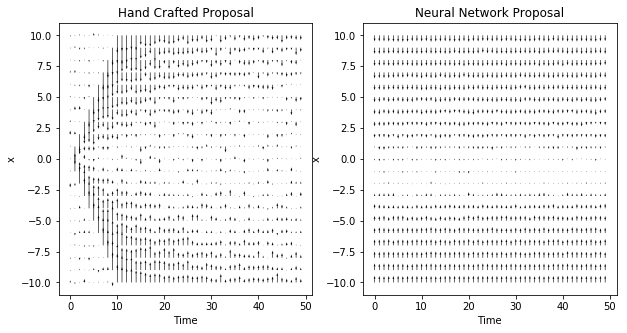

In [7]:
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(121)
ax.quiver(t, x, x_arrows, y_arrows_normal[0])
ax.set_title('Hand Crafted Proposal')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax = f.add_subplot(122)
ax.quiver(t, x, x_arrows, y_arrows_nn[0])
ax.set_title('Neural Network Proposal')
ax.set_xlabel('Time')
ax.set_ylabel('x')